In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
import pretty_midi

In [4]:
%matplotlib notebook

In [24]:
rate, data = scipy.io.wavfile.read("MAPS/ENSTDkCl/ISOL/NO/MAPS_ISOL_NO_F_S0_M68_ENSTDkCl.wav")

In [25]:
data = data.astype(float)
data_mono = librosa.to_mono(data.T)

In [46]:
S = np.abs(librosa.stft(data_mono, n_fft = 2048, hop_length = 1024, pad_mode="wrap"))

(1025, 178)

<IPython.core.display.Javascript object>


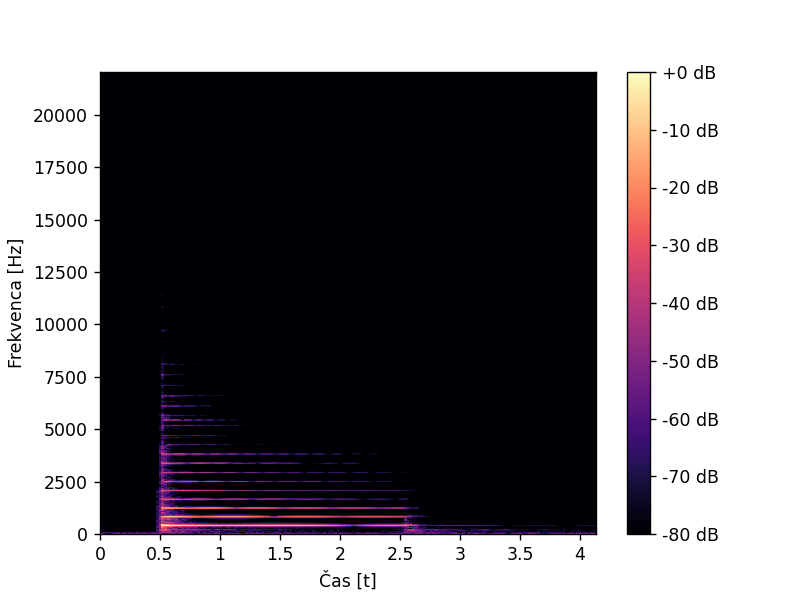

Text(0, 0.5, 'Frekvenca [Hz]')

In [55]:
S_db = librosa.amplitude_to_db(S, ref=np.max)
#tmp = S_db[:256,:]
tmp = S_db
librosa.display.specshow(tmp, x_axis='time', y_axis='linear', sr=rate, hop_length=1024)
plt.colorbar(format="%+2.f dB")
plt.xlabel("Čas [t]")
plt.ylabel("Frekvenca [Hz]")

In [9]:
data_midi = np.zeros((88, S.shape[1])).astype(np.bool)
FRAMES_PER_BIN = 512 / rate
onset_bin = int(float(0.514998)//FRAMES_PER_BIN)
ofset_bin = int(float(2.521)//FRAMES_PER_BIN)
note = int(68)-21
data_midi[note, onset_bin:ofset_bin+1] = True

<IPython.core.display.Javascript object>


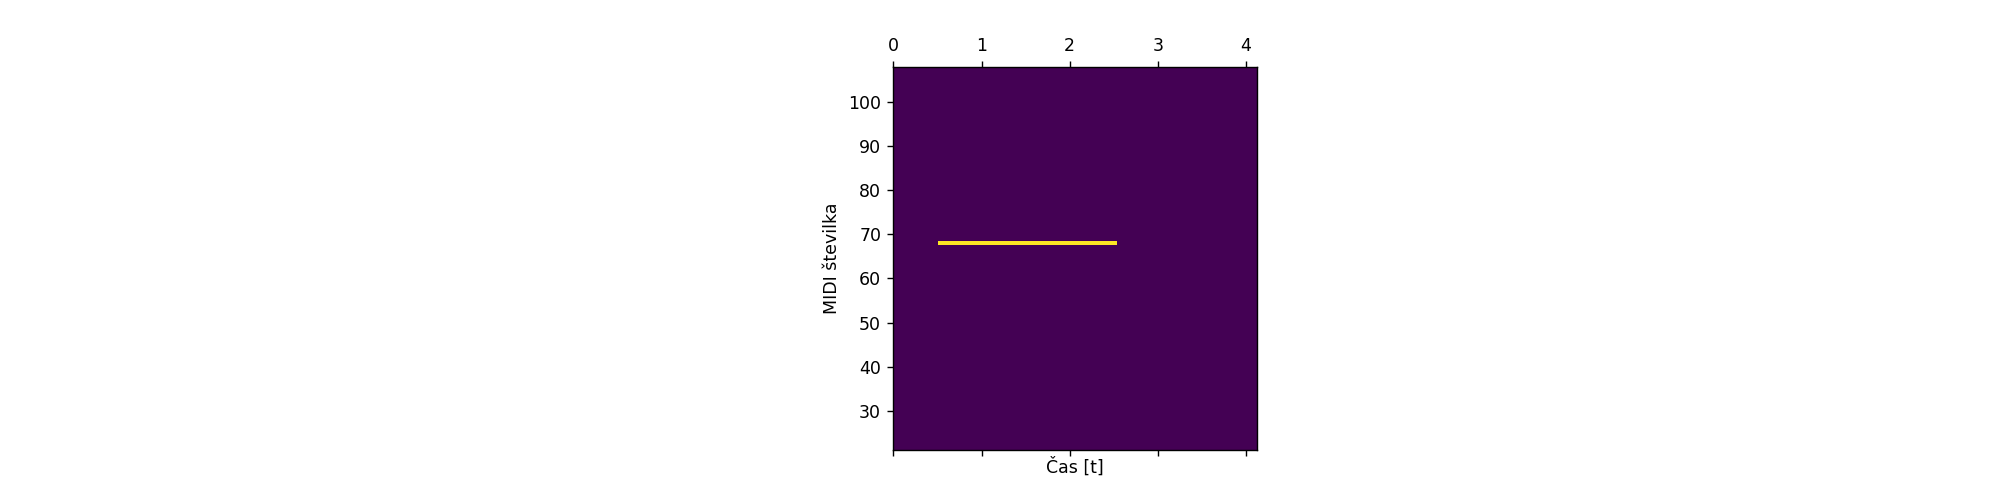

Text(0, 0.5, 'MIDI številka')

In [10]:
plt.matshow(data_midi, aspect=0.05, origin='lower', extent=[0, data.shape[0] / rate, 21, 108])
plt.xlabel("Čas [t]")
plt.ylabel("MIDI številka")

In [29]:
HOP_LENGTH = 1024 #1024 # 512
BINS_PER_OCTAVE = 12 * 2 # 60
N_BINS = BINS_PER_OCTAVE * 8 # 60 * 8

In [30]:
cq = np.abs(librosa.cqt(data_mono, sr = rate, hop_length = HOP_LENGTH,
                               fmin = librosa.note_to_hz(librosa.midi_to_note(21)),
                               bins_per_octave = BINS_PER_OCTAVE, n_bins = N_BINS,
                               pad_mode = "wrap"))

<IPython.core.display.Javascript object>


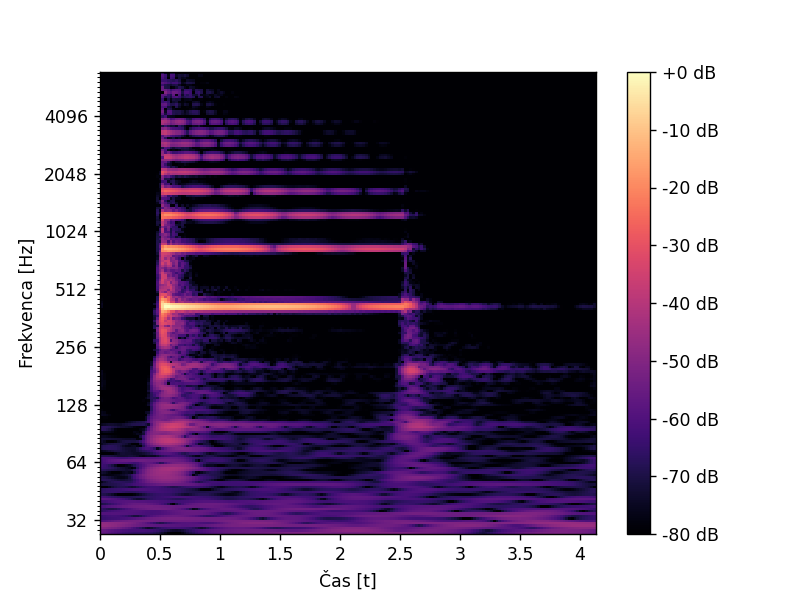

Text(0, 0.5, 'Frekvenca [Hz]')

In [31]:
S_db = librosa.amplitude_to_db(cq, ref=np.max)
librosa.display.specshow(S_db, x_axis='time', y_axis='cqt_hz', sr=rate, fmin=librosa.note_to_hz(librosa.midi_to_note(21)),
                         hop_length=HOP_LENGTH, bins_per_octave=BINS_PER_OCTAVE)
plt.colorbar(format="%+2.0f dB")
plt.xlabel("Čas [t]")
plt.ylabel("Frekvenca [Hz]")